### aim: 

I can't get regrid to play nicely, here's a documenation of how:

### if I subset a model and regrid that, it works fine:

1) download a random grid_T, ptrc_T, diad_T file from some model to 

`/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/paperFigures/regrid_forcing`

2) make a single-variable file from a ptrc file with ncrcat:

`int` #interactive session

`module add nco/4.9.3` 

`ncrcat -v nav_lon,nav_lat,time_counter,deptht,BAC ORCA2_1m_19600101_19601231_ptrc_T.nc TOM12_1960_BAC.nc`
`ncrcat -v nav_lon,nav_lat,time_counter,Cflx ORCA2_1m_20200101_20201231_diad_T.nc TOM12_1960_Cflx.nc`

(1960 is wrong here for the Cflx file, doesn't matter)

3) 

`modadd` #adds modules

`regrid TOM12_1960_BAC.nc` gives `TOM12_1960_BAC_regridded.nc`
`regrid TOM12_1960_Cflx.nc` gives `regrid TOM12_1960_Cflx_regridded.nc`


So I will try to take `TOM12_1960_BAC.nc` , which can be regridded, and modify it

Alternately `TOM12_1960_Cflx.nc` can also be regridded

In [41]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [42]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [43]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

how dataset looks before modification
<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, time_counter: 12, x: 182, y: 149)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
    time_centered         (time_counter) object ...
  * time_counter          (time_counter) object 2020-01-16 12:00:00 ... 2020-...
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds) object ...
    time_counter_bounds   (time_counter, axis_nbounds) object ...
    Cflx                  (time_counter, y, x) float32 ...
Attributes:
    name:         ORCA2_1m_20200101_20201231
    description:  additional planktom diagnostics
    title:        additional planktom diagnostics
    Conventions:  CF-1.5
    production:   An IPSL model
    timeStamp:    2022-Aug-01 15:06:11 BST
    history:      Wed May 24 11:35:39 2023: ncrcat -v nav_lon,nav_lat,time_co...
    NCO:          netCDF Operators 

Text(0.5, 1.0, 'BAC (dummy variable) in test file')

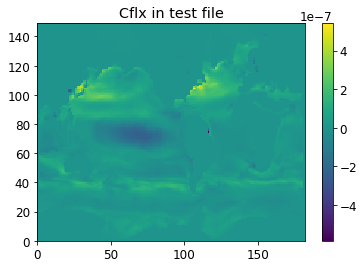

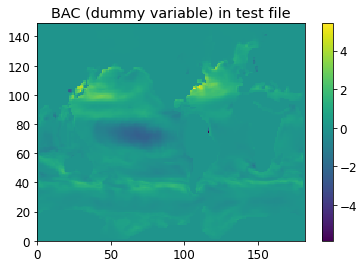

In [44]:
w = xr.open_dataset('TOM12_1960_Cflx.nc')
print('how dataset looks before modification')
print(w)

##add a new variable and modify it a bit
w['BAC'] = w.Cflx.copy(deep=True) #call it BAC because we know BAC is an 'acceptable' varname from the regrid function

w['BAC'] = w['BAC'] * 1e7

print()
print()
print('how dataset looks after adding dummy variable')
print(w)

plt.figure()
q = plt.pcolormesh(w['Cflx'][0,:,:])
plt.colorbar(q)
plt.title('Cflx in test file')
plt.figure()
q = plt.pcolormesh(w['BAC'][0,:,:])
plt.colorbar(q)
plt.title('BAC (dummy variable) in test file')

#w.to_netcdf('TOM12_1960_Cflx_AMEND.nc')

In [45]:
w2 = xr.open_dataset('TOM12_1960_Cflx.nc')
print('how dataset looks before modification')
print(w2)

##add a new variable and modify it a bit, BAC from the above

w2['BAC'] = xr.DataArray(w.BAC.values, w2.Cflx.coords, w2.Cflx.dims, w2.Cflx.attrs)
w2.BAC.attrs = w2.Cflx.attrs

print()
print()
print('how dataset looks after adding dummy variable')
print(w2)

# plt.figure()
# q = plt.pcolormesh(w2['Cflx'][0,:,:])
# plt.colorbar(q)
# plt.title('Cflx in test file')
# plt.figure()
# q = plt.pcolormesh(w2['BAC'][0,:,:])
# plt.colorbar(q)
# plt.title('BAC (dummy variable) in test file')

#w2.to_netcdf('TOM12_1960_Cflx_AMEND2.nc')

how dataset looks before modification
<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, time_counter: 12, x: 182, y: 149)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
    time_centered         (time_counter) object ...
  * time_counter          (time_counter) object 2020-01-16 12:00:00 ... 2020-...
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds) object ...
    time_counter_bounds   (time_counter, axis_nbounds) object ...
    Cflx                  (time_counter, y, x) float32 ...
Attributes:
    name:         ORCA2_1m_20200101_20201231
    description:  additional planktom diagnostics
    title:        additional planktom diagnostics
    Conventions:  CF-1.5
    production:   An IPSL model
    timeStamp:    2022-Aug-01 15:06:11 BST
    history:      Wed May 24 11:35:39 2023: ncrcat -v nav_lon,nav_lat,time_co...
    NCO:          netCDF Operators 

In [46]:
w2.Cflx.attrs

{'long_name': '',
 'units': 'mol/m2/s',
 'online_operation': 'average',
 'interval_operation': '5760 s',
 'interval_write': '1 month',
 'cell_methods': 'time: mean (interval: 5760 s)'}

In [47]:
w2.BAC.attrs

{'long_name': '',
 'units': 'mol/m2/s',
 'online_operation': 'average',
 'interval_operation': '5760 s',
 'interval_write': '1 month',
 'cell_methods': 'time: mean (interval: 5760 s)'}

## regrid with cdo

https://stackoverflow.com/questions/62444938/regridding-a-netcdf-file-using-bilinear-interpolation-in-cdo

`cdo remapbil,r360x180 TOM12_1960_Cflx_AMEND.nc TOM12_1960_Cflx_AMEND_cdoregrid.nc`

In [54]:
cflx_orig = xr.open_dataset('TOM12_1960_Cflx_AMEND.nc')
cflx_cdoregrid = xr.open_dataset('TOM12_1960_Cflx_AMEND_cdoregrid.nc')

Text(0.5, 0.98, 'files made with cdo remapbil,r360x180 TOM12_1960_Cflx_AMEND.nc TOM12_1960_Cflx_AMEND_cdoregrid.nc')

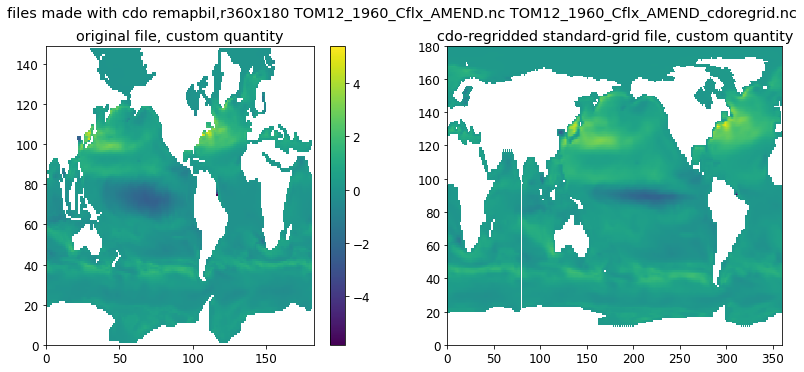

In [60]:
BAC_cdoregrid = cflx_cdoregrid.BAC.values
BAC_cdoregrid[BAC_cdoregrid == 0] = np.nan

BAC_orig = cflx_orig.BAC.values
BAC_orig[BAC_orig == 0] = np.nan

fact = 1.1
fig, axs = plt.subplots(1,2, figsize=(12*fact, 5*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

q = axs[0].pcolormesh(cflx_orig['BAC'][0,:,:])
plt.colorbar(q, ax = axs[0])
axs[0].set_title('original file, custom quantity')
axs[1].pcolormesh(cflx_cdoregrid['BAC'][0,:,:])
axs[1].set_title('cdo-regridded standard-grid file, custom quantity')

plt.suptitle('files made with cdo remapbil,r360x180 TOM12_1960_Cflx_AMEND.nc TOM12_1960_Cflx_AMEND_cdoregrid.nc')

<xarray.Dataset>
Dimensions:            (bnds: 2, lat: 180, lon: 360, time_counter: 12)
Coordinates:
  * time_counter       (time_counter) object 2020-01-16 12:00:00 ... 2020-12-...
  * lon                (lon) float64 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * lat                (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Dimensions without coordinates: bnds
Data variables:
    time_counter_bnds  (time_counter, bnds) object ...
    Cflx               (time_counter, lat, lon) float32 ...
    BAC                (time_counter, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.5
    name:         ORCA2_1m_20200101_20201231
    description:  additional planktom diagnostics
    title:        additional planktom diagnostics
    production:   An IPSL model
    timeStamp:    2022-Aug-01 15:06:11 BST
    history:      Wed May 24 14:33:34 2023: cdo remapbil,r360x180 TOM12_1960_...
    NCO:          netCDF Operators version 4.9.3 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...